# Advanced Analytics – Assignment 1 

## A. Pre-processing and cleaning the dataset

### Preliminary actions

In [1]:
# Importing required libraries 
import numpy as np 
import pandas as pd 
from collections import Counter
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from geopy.distance import distance
from datetime import date
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from scipy.stats import f_oneway
import scipy.stats as stats
import itertools
import os

from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

!pip install mitosheet 
import mitosheet 

!pip install xgboost
import xgboost as xgb
from xgboost import plot_importance

%config InlineBackend.figure_format = "svg"

In [2]:
# Importing the dataset 
df = pd.read_csv('../datasets/train.csv')

In [3]:
# Glancing over the dataset
df.head()

property_id                                    property_name  \
0            1                    Chambre à louer,courte durée.   
1            2  Urban Antwerp - Spacious & Authentic Herenhouse   
2            3   comfortable apartment in friendly neighborhood   
3            4                         Historical City Antwerp.   
4            5                              Antwerp center city   

                                    property_summary  \
0  Je loue une chambre dans mon appartement "atyp...   
1  Our place is a typical historic herenhuis clos...   
2  Nice and cozy apartment for couples who like t...   
3  The best place to stay if you like to be in th...   
4  Our place is right in the heart of the histori...   

                                      property_space  \
0  Espace duplex très grand et lumineux,la chambr...   
1  The spaces in our house are all large with hig...   
2  Nice proper and clean apartment. No personal s...   
3  Our rooms are nice and spacious. You stay in a...   
4  It is situated in the center if the old town. ...   

                                       property_desc  \
0  Je loue une chambre dans mon appartement "atyp...   
1  Our place is a typical historic herenhuis clos...   
2  Nice and cozy apartment for couples who like t...   
3  The best place to stay if you like to be in th...   
4  Our place is right in the heart of the histori...   

                               property_neighborhood  \
0                                                NaN   
1  Bar and restaurants One of our favourite bars ...   
2  Op 5 minuten lopen zijn er 2 gezellig stadpark...   
3    In the middle of the historical city of Antwerp   
4  The neighborhood is in the historical part of ...   

                                      property_notes  \
0                                                NaN   
1                                                NaN   
2  Public transport is next to the apartment and ...   
3  Staying in our house you have to be able to cl...   
4                                                NaN   

                                    property_transit  \
0  Accès direct de la Gare du Nord  ( 4 arrêts de...   
1  In Antwerp we have the system with rental bike...   
2  Fiets verhuur voor de deur. (dag/weekkaart) vi...   
3  Tram 10 and 11 from Central station stop in ou...   
4  The easiest is just to walk into the city ther...   

                                     property_access  \
0                                                NaN   
1  You will be able to access the following space...   
2  As a good host I trust my guest. No secrets an...   
3  Beside your own room you can relax in the down...   
4  You will enter the house through the Downstair...   

                                property_interaction  ... reviews_rating  \
0  Je suis entièrement disponible pour tout échan...  ...           97.0   
1  We are always available to help and assist whe...  ...          100.0   
2  Ik ben altijd bereikbaar voor vragen, maar ben...  ...           93.0   
3  We will be available to let you know where wha...  ...           98.0   
4  I will be present to help you out with any kin...  ...           97.0   

  reviews_acc  reviews_cleanliness  reviews_checkin reviews_communication  \
0        10.0                  9.0             10.0                  10.0   
1        10.0                 10.0             10.0                  10.0   
2        10.0                 10.0              9.0                   9.0   
3        10.0                 10.0             10.0                  10.0   
4        10.0                 10.0             10.0                  10.0   

  reviews_location  reviews_value  reviews_per_month  \
0              9.0           10.0               1.31   
1              8.0           10.0               1.00   
2              9.0           10.0               0.75   
3             10.0           10.0               6.90   
4             10.0           10.0        

In [4]:
# Removing irrelevant and "free text" columns

# Deleted columns property_id
df.drop(['property_id'], axis=1, inplace=True)

# Deleted columns property_name
df.drop(['property_name'], axis=1, inplace=True)

# Deleted columns property_summary
df.drop(['property_summary'], axis=1, inplace=True)

# Deleted columns property_space
df.drop(['property_space'], axis=1, inplace=True)

# Deleted columns property_desc
df.drop(['property_desc'], axis=1, inplace=True)

# Deleted columns property_neighborhood
df.drop(['property_neighborhood'], axis=1, inplace=True)

# Deleted columns property_notes
df.drop(['property_notes'], axis=1, inplace=True)

# Deleted columns property_transit
df.drop(['property_transit'], axis=1, inplace=True)

# Deleted columns property_access
df.drop(['property_access'], axis=1, inplace=True)

# Deleted columns property_interaction
df.drop(['property_interaction'], axis=1, inplace=True)

# Deleted columns property_rules
df.drop(['property_rules'], axis=1, inplace=True)

# Deleted columns property_scraped_at
df.drop(['property_scraped_at'], axis=1, inplace=True)

# Deleted columns property_last_updated
df.drop(['property_last_updated'], axis=1, inplace=True)

# Deleted columns host_id
df.drop(['host_id'], axis=1, inplace=True)

# Deleted columns host_location
df.drop(['host_location'], axis=1, inplace=True)

# Deleted columns host_about
df.drop(['host_about'], axis=1, inplace=True)

# Deleted columns host_nr_listings_total
df.drop(['host_nr_listings_total'], axis=1, inplace=True)

# Deleted columns host_verified
df.drop(['host_verified'], axis=1, inplace=True)

# Deleted columns booking_max_nights
df.drop(['booking_max_nights'], axis=1, inplace=True)

# Deleted columns reviews_first
df.drop(['reviews_first'], axis=1, inplace=True)

# Deleted columns reviews_last
df.drop(['reviews_last'], axis=1, inplace=True)

In [5]:
# Checking missing values
df.isna().sum()

property_zipcode             134
property_lat                   0
property_lon                   0
property_type                  0
property_room_type             0
property_max_guests            0
property_bathrooms            12
property_bedrooms              9
property_beds                 11
property_bed_type              0
property_amenities            52
property_sqfeet             6333
host_since                     1
host_response_time          1461
host_response_rate          1461
host_nr_listings               1
booking_price_covers           0
booking_min_nights             0
booking_availability_30        0
booking_availability_60        0
booking_availability_90        0
booking_availability_365       0
booking_cancel_policy          0
reviews_num                    0
reviews_rating              1383
reviews_acc                 1399
reviews_cleanliness         1397
reviews_checkin             1401
reviews_communication       1396
reviews_location            1403
reviews_va

In [6]:
# Removing property_sqfeet as there are too many missing values
df.drop(['property_sqfeet'], axis=1, inplace=True)

In [7]:
# Removing host_response_time as its NaN values are identifal to host_response_rate
df.drop(['host_response_time'], axis=1, inplace=True)

### Cleaning the attributes

#### property_zipcode

In [8]:
# Cleaning property_zipcode

# Missing values
print(df['property_zipcode'].isna().sum())
df.dropna(subset=['property_zipcode'], inplace=True)

# Outliers (not relevant)

# Transformations
df['property_zipcode'] = df['property_zipcode'].apply(lambda x: 'Brussels' if x.startswith('1') else ('Antwerp' if x.startswith('2') else x))
one_hot_zipcode = pd.get_dummies(df['property_zipcode'])
df = df.drop('property_zipcode', axis=1).join(one_hot_zipcode)
df = df.drop('Antwerp', axis=1)

134


#### property_lat and property_lon

In [9]:
# Cleaning property_lat and property_lon

# Missing values
print(df['property_lat'].isna().sum())
print(df['property_lon'].isna().sum())

# Outliers

# Calculating the new column distance_to_center
brussels_lat = 50.8503
brussels_lon = 4.3517
antwerp_lat = 51.2194
antwerp_lon = 4.4025

def calculate_distance(lat1, lon1, lat2, lon2):
    return distance((lat1, lon1), (lat2, lon2)).km

df['distance_to_center'] = np.where(df['Brussels'] == 1, 
                                         df.apply(lambda row: calculate_distance(row['property_lat'], row['property_lon'], brussels_lat, brussels_lon), axis=1), 
                                         df.apply(lambda row: calculate_distance(row['property_lat'], row['property_lon'], antwerp_lat, antwerp_lon), axis=1))
# Remove the outliers
Q1_distance = np.percentile(df['distance_to_center'], 25)
Q3_distance = np.percentile(df['distance_to_center'], 75)
IQR_distance = Q3_distance - Q1_distance

df = df[(df['distance_to_center'] >= Q1_distance - 1.5*IQR_distance) & (df['distance_to_center'] <= Q3_distance + 1.5*IQR_distance)]

# Transformations
scaler = StandardScaler()
df['distance_to_center'] = scaler.fit_transform(df[['distance_to_center']])

df = df.drop('property_lon', axis=1)
df = df.drop('property_lat', axis=1)

0
0


#### property_type

In [10]:
# Cleaning property_type

# Missing values
print(df['property_type'].isna().sum())
print(df['property_type'].value_counts())
df['property_type'] = df['property_type'].apply(lambda x: 'Apartment' if x == 'Apartment' else 'Other')

# Outliers (not relevant)

# Transformations 
df['property_type'] = df['property_type'].map({'Apartment': 1, 'Other': 0})

0
Apartment             4804
House                  797
Loft                   167
Bed & Breakfast        153
Townhouse              108
Condominium             73
Guesthouse              33
Other                   28
Villa                   14
Cabin                    7
Serviced apartment       4
Castle                   3
Dorm                     2
Boutique hotel           2
Hostel                   2
Guest suite              2
Earth House              1
Yurt                     1
Boat                     1
Tent                     1
Timeshare                1
Name: property_type, dtype: int64


#### property_room_type

In [11]:
# Cleaning property_room_type

# Missing values
print(df['property_room_type'].isna().sum())
print(df['property_room_type'].value_counts())
df = df.drop(df[df['property_room_type'] == 'Shared room'].index)

# Outliers (not relevant)

# Transformations
df['property_room_type'] = df['property_room_type'].map({'Entire home/apt': 1, 'Private room': 0})

0
Entire home/apt    4060
Private room       2064
Shared room          80
Name: property_room_type, dtype: int64


#### property_max_guests

In [12]:
# Cleaning property_max_guests

# Missing values
print(df['property_max_guests'].isna().sum())

# Outliers
Q1_guests = df['property_max_guests'].quantile(0.25)
Q3_guests = df['property_max_guests'].quantile(0.75)
IQR_guests = Q3_guests - Q1_guests

upper_bound_guests = Q3_guests + 1.5 * IQR_guests
df = df[(df['property_max_guests'] <= upper_bound_guests)]

# Transformations
df['property_max_guests'] = scaler.fit_transform(df[['property_max_guests']])

0


#### property_bathrooms

In [13]:
# Cleaning property_bathrooms

# Missing values
print(df['property_bathrooms'].isna().sum())
median_property_bathrooms = df['property_bathrooms'].median()
df['property_bathrooms'].fillna(median_property_bathrooms, inplace=True)

# Outliers
df = df[(df['property_bathrooms'] <= 3)]

# Transformations
df['property_bathrooms'] = scaler.fit_transform(df[['property_bathrooms']])

11


#### property_bedrooms

In [14]:
# Cleaning property_bedrooms

# Missing values
print(df['property_bedrooms'].isna().sum())
median_property_bedrooms = df['property_bedrooms'].median()
df['property_bedrooms'].fillna(median_property_bedrooms, inplace=True)

# Outliers
df = df[(df['property_bedrooms'] <= 4)]

# Transformations
df['property_bedrooms'] = scaler.fit_transform(df[['property_bedrooms']])

7


#### property_beds

In [15]:
# Cleaning property_beds

# Missing values
print(df['property_beds'].isna().sum())
median_property_beds = df['property_beds'].median()
df['property_beds'].fillna(median_property_beds, inplace=True)

# Outliers
df = df[(df['property_beds'] <= 5)]

# Transformations
df['property_beds'] = scaler.fit_transform(df[['property_beds']])

7


#### property_bed_type

In [16]:
# Cleaning property_bed_type

# Checking for attribute values
print(df.property_bed_type.value_counts())

# Removing property_bed_type
df.drop(['property_bed_type'], axis=1, inplace=True)

Real Bed         5747
Pull-out Sofa     138
Futon              31
Couch              17
Airbed              4
Name: property_bed_type, dtype: int64


#### property_amenities

In [17]:
# Cleaning property_amenities

# Missing values
print(df['property_amenities'].isna().sum())
df.dropna(subset=['property_amenities'], inplace=True)

# Outliers (not relevant)

# Transformations

# Creating a set of possible amenities found in a property
amenities_list = df['property_amenities'].tolist()
amenities_set = set()
for amenity_string in amenities_list:
    if pd.notnull(amenity_string):
        amenities = amenity_string.split(',')
        for amenity in amenities:
            stripped_amenity = amenity.strip()
            if stripped_amenity and stripped_amenity not in ['translation missing: en.hosting_amenity_49', 'translation missing: en.hosting_amenity_50']:
                amenities_set.add(stripped_amenity)
amenities_set

# Creating dummy columns vis a vis amenities for each property
def dum_col_filling(main_col_val, dum_col_name, main_col_name):
    if dum_col_name.replace(main_col_name + ': ', '') in main_col_val:
        return 1
    else:
        return 0
    
def set_to_dummies(df, column_name):
    all_values_of_sets = amenities_set
    dummy_columns_name = [column_name + ': ' + dum_col for dum_col in all_values_of_sets if dum_col]
    dummy_df = pd.DataFrame(0, index=df.index, columns=dummy_columns_name)
    for dum_col_name in dummy_columns_name:
        for i in df.index:
            dummy_df[dum_col_name][i] = dum_col_filling(df[column_name][i], dum_col_name, column_name)
    df = pd.concat([df, dummy_df], axis=1)
    return df

df = set_to_dummies(df,'property_amenities')
df.drop(['property_amenities'], axis=1, inplace=True)

# Only including those amenities where one category (zero or one) occurs more than 20% of the time
dropped_cols_amenities = []
for col in df.columns:
    if col.startswith('property_amenities'):
        freq = df[col].value_counts(normalize=True)
        if (freq[0] > 0.8):
            df = df.drop(col, axis=1)
            dropped_cols_amenities.append(col)

print("Dropped columns:", dropped_cols_amenities)

49
Dropped columns: ['property_amenities: Safety card', 'property_amenities: Cat(s)', 'property_amenities: Changing table', 'property_amenities: Flat smooth pathway to front door', 'property_amenities: Lockbox', 'property_amenities: Dishwasher', 'property_amenities: Coffee maker', 'property_amenities: BBQ grill', 'property_amenities: Smoking allowed', 'property_amenities: Luggage dropoff allowed', 'property_amenities: Cleaning before checkout', 'property_amenities: Washer / Dryer', 'property_amenities: Wide clearance to bed', 'property_amenities: Bathtub', 'property_amenities: Air conditioning', 'property_amenities: Step-free access', 'property_amenities: Wide doorway', 'property_amenities: Window guards', 'property_amenities: Breakfast', 'property_amenities: Grab-rails for shower and toilet', 'property_amenities: Patio or balcony', 'property_amenities: Indoor fireplace', 'property_amenities: Oven', 'property_amenities: Long term stays allowed', 'property_amenities: Fireplace guards', 

#### host_since

In [18]:
# Cleaning host_since

# Missing values 
print(df['host_since'].isna().sum())
df.dropna(subset=['host_since'], inplace=True)

# Outliers (none)

# Transformations
df.host_since = pd.to_datetime(df.host_since) 
today = date.today()
df['days_since_host'] = (pd.to_datetime('today') - pd.to_datetime(df['host_since'])).dt.days
df.drop(['host_since'], axis=1, inplace=True)
df['days_since_host'] = scaler.fit_transform(df[['days_since_host']])

1


#### host_response_rate

In [19]:
# Cleaning host_response_rate

# Missing values 
print(df['host_response_rate'].isna().sum())
df['host_response_rate'] = df['host_response_rate'].fillna('unknown')

# Binning the host_response_rate
df['host_response_rate'] = pd.to_numeric(df['host_response_rate'], errors='coerce')
df['host_response_rate'] = pd.cut(df['host_response_rate'], bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)
df.host_response_rate = df.host_response_rate.astype('str')
df.host_response_rate.replace('nan', 'unknown', inplace=True)

# Outliers (not relevant)

# Transformations 
host_response_rate_dummies = pd.get_dummies(df.host_response_rate, prefix="host_response_rate")
df = pd.concat([df, host_response_rate_dummies], axis=1)
df.drop("host_response_rate", axis=1, inplace=True)
df.drop("host_response_rate_unknown", axis=1, inplace=True)

1314


#### host_nr_listings

In [20]:
# Cleaning host_nr_listings

# Missing values
print(df['host_nr_listings'].isna().sum())

# Outliers
Q1_listings = df['host_nr_listings'].quantile(0.25)
Q3_listings = df['host_nr_listings'].quantile(0.75)
IQR_listings = Q3_listings - Q1_listings

lower_bound_listings = Q1_listings - 1.5 * IQR_listings
upper_bound_listings = Q3_listings + 1.5 * IQR_listings

df = df[(df['host_nr_listings'] >= lower_bound_listings) & (df['host_nr_listings'] <= upper_bound_listings)]

# Transformations
df['host_nr_listings'] = scaler.fit_transform(df[['host_nr_listings']])

0


#### booking_price_covers

In [21]:
# Cleaning booking_price_covers

# Missing values
print(df['booking_price_covers'].isna().sum())
df.drop(['booking_price_covers'], axis=1, inplace=True)

# Outliers (not relevant)

# Transformations (not relevant)

0


#### booking_min_nights

In [22]:
# Cleaning booking_min_nights

# Missing values
print(df['booking_min_nights'].isna().sum())

# Outliers
Q1_minnights = df['booking_min_nights'].quantile(0.25)
Q3_minnights = df['booking_min_nights'].quantile(0.75)
IQR_minnights = Q3_minnights - Q1_minnights

lower_bound_minnights = Q1_minnights - 1.5 * IQR_minnights
upper_bound_minnights = Q3_minnights + 1.5 * IQR_minnights

df = df[(df['booking_min_nights'] >= lower_bound_minnights) & (df['booking_min_nights'] <= upper_bound_minnights)]

# Transformations
df['booking_min_nights'] = scaler.fit_transform(df[['booking_min_nights']])

0


#### booking_availability_X

In [23]:
# Cleaning booking_availability

# Missing values
df.drop(['booking_availability_30'], axis=1, inplace=True)
df.drop(['booking_availability_60'], axis=1, inplace=True)
df.drop(['booking_availability_365'], axis=1, inplace=True)
print(df['booking_availability_90'].isna().sum())

# Outliers (not relevant)

# Transformations
df['booking_availability_90'] = scaler.fit_transform(df[['booking_availability_90']])

0


#### booking_cancel_policy

In [24]:
# Cleaning booking_cancel_policy

# Missing values
print(df['booking_cancel_policy'].isna().sum())
df = df[df['booking_cancel_policy'] != 'super_strict_30']

# Outliers (not relevant)

# Transformations
dummies_policy = pd.get_dummies(df['booking_cancel_policy'], prefix='cancel_policy')
df = pd.concat([df, dummies_policy], axis=1)
df.drop(['booking_cancel_policy'], axis=1, inplace=True)
df.drop(['cancel_policy_strict'], axis=1, inplace=True)

0


#### reviews_num

In [25]:
# Cleaning reviews_num

# Missing values
print(df['reviews_num'].isna().sum())
mode_reviews_num = df['reviews_num'].mode()
df['reviews_num'] = df['reviews_num'].fillna('mode_reviews_num')

# Outliers
Q1_num = df['reviews_num'].quantile(0.25)
Q3_num = df['reviews_num'].quantile(0.75)
IQR_num = Q3_num - Q1_num

lower_bound_num = Q1_num - 1.5 * IQR_num
upper_bound_num = Q3_num + 1.5 * IQR_num

df = df[(df['reviews_num'] >= lower_bound_num) & (df['reviews_num'] <= upper_bound_num)]

# Transformations
df['reviews_num'] = scaler.fit_transform(df[['reviews_num']])

0


#### reviews_rating

In [26]:
# Cleaning reviews_rating

# Missing values
print(df['reviews_rating'].isna().sum())
df['reviews_rating'] = df['reviews_rating'].fillna('unknown')

df['reviews_rating'] = pd.to_numeric(df['reviews_rating'], errors='coerce')
df['reviews_rating'] = pd.cut(df['reviews_rating'], bins=[0, 90, 95, 100], labels=['0-89/100', '90-94/100', '95-100/100'], include_lowest=True)
df.reviews_rating = df.reviews_rating.astype('str')
df.reviews_rating.replace('nan', 'unknown', inplace=True)

# Outliers (not relevant)

# Transformations
reviews_rating_dummies = pd.get_dummies(df.reviews_rating, prefix="reviews_rating")
df = pd.concat([df, reviews_rating_dummies], axis=1)
df.drop("reviews_rating", axis=1, inplace=True)
df.drop("reviews_rating_unknown", axis=1, inplace=True)

862


#### reviews_acc, reviews_cleanliness, reviews_checkin, reviews_communication, reviews_location and reviews_value

In [27]:
# Cleaning reviews_acc

# Missing values
print(df['reviews_acc'].isna().sum())
df['reviews_acc'] = df['reviews_acc'].fillna('unknown')

df['reviews_acc'] = pd.to_numeric(df['reviews_acc'], errors='coerce')
df['reviews_acc'] = pd.cut(df['reviews_acc'], bins=[0, 8, 9, 10], labels=['0-8/10', '9/10', '10/10'], include_lowest=True)
df.reviews_acc = df.reviews_acc.astype('str')
df.reviews_acc.replace('nan', 'unknown', inplace=True)

# Outliers (not relevant)

# Transformations
reviews_acc_dummies = pd.get_dummies(df.reviews_acc, prefix="reviews_acc")
df = pd.concat([df, reviews_acc_dummies], axis=1)
df.drop("reviews_acc", axis=1, inplace=True)
df.drop("reviews_acc_unknown", axis=1, inplace=True)

875


In [28]:
# Cleaning reviews_cleanliness

# Missing values
print(df['reviews_cleanliness'].isna().sum())
df['reviews_cleanliness'] = df['reviews_cleanliness'].fillna('unknown')

df['reviews_cleanliness'] = pd.to_numeric(df['reviews_cleanliness'], errors='coerce')
df['reviews_cleanliness'] = pd.cut(df['reviews_cleanliness'], bins=[0, 8, 9, 10], labels=['0-8/10', '9/10', '10/10'], include_lowest=True)
df.reviews_cleanliness = df.reviews_cleanliness.astype('str')
df.reviews_cleanliness.replace('nan', 'unknown', inplace=True)

# Outliers (not relevant)

# Transformations
reviews_cleanliness_dummies = pd.get_dummies(df.reviews_cleanliness, prefix="reviews_cleanliness")
df = pd.concat([df, reviews_cleanliness_dummies], axis=1)
df.drop("reviews_cleanliness", axis=1, inplace=True)
df.drop("reviews_cleanliness_unknown", axis=1, inplace=True)

871


In [29]:
# Cleaning reviews_checkin

# Missing values
print(df['reviews_checkin'].isna().sum())
df['reviews_checkin'] = df['reviews_checkin'].fillna('unknown')

df['reviews_checkin'] = pd.to_numeric(df['reviews_checkin'], errors='coerce')
df['reviews_checkin'] = pd.cut(df['reviews_checkin'], bins=[0, 8, 9, 10], labels=['0-8/10', '9/10', '10/10'], include_lowest=True)
df.reviews_checkin = df.reviews_checkin.astype('str')
df.reviews_checkin.replace('nan', 'unknown', inplace=True)

# Outliers (not relevant)

# Transformations
reviews_checkin_dummies = pd.get_dummies(df.reviews_checkin, prefix="reviews_checkin")
df = pd.concat([df, reviews_checkin_dummies], axis=1)
df.drop("reviews_checkin", axis=1, inplace=True)
df.drop("reviews_checkin_unknown", axis=1, inplace=True)

876


In [30]:
# Cleaning reviews_communication

# Missing values
print(df['reviews_communication'].isna().sum())
df['reviews_communication'] = df['reviews_communication'].fillna('unknown')

df['reviews_communication'] = pd.to_numeric(df['reviews_communication'], errors='coerce')
df['reviews_communication'] = pd.cut(df['reviews_communication'], bins=[0, 8, 9, 10], labels=['0-8/10', '9/10', '10/10'], include_lowest=True)
df.reviews_communication = df.reviews_communication.astype('str')
df.reviews_communication.replace('nan', 'unknown', inplace=True)

# Outliers (not relevant)

# Transformations
reviews_communication_dummies = pd.get_dummies(df.reviews_communication, prefix="reviews_communication")
df = pd.concat([df, reviews_communication_dummies], axis=1)
df.drop("reviews_communication", axis=1, inplace=True)
df.drop("reviews_communication_unknown", axis=1, inplace=True)

872


In [31]:
# Cleaning reviews_location

# Missing values
print(df['reviews_location'].isna().sum())
df['reviews_location'] = df['reviews_location'].fillna('unknown')

df['reviews_location'] = pd.to_numeric(df['reviews_location'], errors='coerce')
df['reviews_location'] = pd.cut(df['reviews_location'], bins=[0, 8, 9, 10], labels=['0-8/10', '9/10', '10/10'], include_lowest=True)
df.reviews_location = df.reviews_location.astype('str')
df.reviews_location.replace('nan', 'unknown', inplace=True)

# Outliers (not relevant)

# Transformations
reviews_location_dummies = pd.get_dummies(df.reviews_location, prefix="reviews_location")
df = pd.concat([df, reviews_location_dummies], axis=1)
df.drop("reviews_location", axis=1, inplace=True)
df.drop("reviews_location_unknown", axis=1, inplace=True)

877


In [32]:
# Cleaning reviews_value

# Missing values
print(df['reviews_value'].isna().sum())
df['reviews_value'] = df['reviews_value'].fillna('unknown')

df['reviews_value'] = pd.to_numeric(df['reviews_value'], errors='coerce')
df['reviews_value'] = pd.cut(df['reviews_value'], bins=[0, 8, 9, 10], labels=['0-8/10', '9/10', '10/10'], include_lowest=True)
df.reviews_value = df.reviews_value.astype('str')
df.reviews_value.replace('nan', 'unknown', inplace=True)

# Outliers (not relevant)

# Transformations
reviews_value_dummies = pd.get_dummies(df.reviews_value, prefix="reviews_value")
df = pd.concat([df, reviews_value_dummies], axis=1)
df.drop("reviews_value", axis=1, inplace=True)
df.drop("reviews_value_unknown", axis=1, inplace=True)

878


#### reviews_per_month

In [33]:
# Cleaning reviews_per_month
df.drop("reviews_per_month", axis=1, inplace=True)

#### extra

In [34]:
# Cleaning extra

# Missing values
print(df['extra'].isna().sum())
df.dropna(subset=['extra'], inplace=True)

# Outliers (not relevant)

# Transformations
extras_list = df['extra'].tolist()
extras_set = set()
for extra_string in extras_list:
    if pd.notnull(extra_string):
        extras = extra_string.split(',')
        for extra in extras:
            stripped_extra = extra.strip()
            if stripped_extra and stripped_extra not in ['Require Guest Phone Verification', 'Require Guest Profile Picture']:
                extras_set.add(stripped_extra)

def new_dum_col_filling(main_col_val, dum_col_name, main_col_name):
    if dum_col_name.replace(main_col_name + ': ', '') in main_col_val:
        return 1
    else:
        return 0
    
def new_set_to_dummies(df, column_name):
    new_all_values_of_sets = extras_set
    new_dummy_columns_name = [column_name + ': ' + dum_col for dum_col in new_all_values_of_sets if dum_col]
    new_dummy_df = pd.DataFrame(0, index=df.index, columns=new_dummy_columns_name)
    for dum_col_name in new_dummy_columns_name:
        for i in df.index:
            new_dummy_df[dum_col_name][i] = new_dum_col_filling(df[column_name][i], dum_col_name, column_name)
    df = pd.concat([df, new_dummy_df], axis=1)
    return df
    
df = new_set_to_dummies(df, 'extra')
df = df.drop(['extra'],axis=1)

# Only including those extras where one category (zero or one) occurs more than 20% of the time
dropped_cols_extra = []
for col in df.columns:
    if col.startswith('extra'):
        freq = df[col].value_counts(normalize=True)
        if (freq[0] > 0.8):
            df = df.drop(col, axis=1)
            dropped_cols_extra.append(col)

print("Dropped columns:", dropped_cols_extra)

2
Dropped columns: ['extra: Host Is Superhost']


#### target

In [35]:
# Cleaning target

# Missing values
print(df['target'].isna().sum())

# Outliers
Q1_target = df['target'].quantile(0.25)
Q3_target = df['target'].quantile(0.75)
IQR_target = Q3_target - Q1_target

lower_bound_target = Q1_target - 1.5 * IQR_target
upper_bound_target = Q3_target + 1.5 * IQR_target

df = df[(df['target'] >= lower_bound_target) & (df['target'] <= upper_bound_target)]

# Transformations (not relevant)

0


### Transforming the attributes

In [36]:
# Checking if all data types are OK for the remaining columns
for col_name, data_type in df.dtypes.iteritems():
    print(f'{col_name}: {data_type}')

property_type: int64
property_room_type: int64
property_max_guests: float64
property_bathrooms: float64
property_bedrooms: float64
property_beds: float64
host_nr_listings: float64
booking_min_nights: float64
booking_availability_90: float64
reviews_num: float64
target: int64
Brussels: uint8
distance_to_center: float64
property_amenities: Laptop friendly workspace: int64
property_amenities: Heating: int64
property_amenities: Cable TV: int64
property_amenities: Iron: int64
property_amenities: Wireless Internet: int64
property_amenities: 24-hour check-in: int64
property_amenities: Carbon monoxide detector: int64
property_amenities: Hangers: int64
property_amenities: Buzzer/wireless intercom: int64
property_amenities: Fire extinguisher: int64
property_amenities: Elevator in building: int64
property_amenities: Shampoo: int64
property_amenities: Essentials: int64
property_amenities: Dryer: int64
property_amenities: First aid kit: int64
property_amenities: Smoke detector: int64
property_ameni

In [37]:
# Checking if all numerical columns are standardized
from sklearn.preprocessing import StandardScaler

numerical_columns = ['property_max_guests', 'property_bathrooms', 'property_bedrooms', 
                     'property_beds', 'host_nr_listings', 'booking_min_nights', 'booking_availability_90', 
                     'reviews_num', 'distance_to_center', 'days_since_host', 'target']

for col in numerical_columns:
    mean = df[col].mean()
    std = df[col].std()
    if abs(mean) > 0.1 or abs(std - 1) > 0.1:
        print(f'Column "{col}" is not standardized (mean = {mean:.2f}, std = {std:.2f})')
    else:
        print(f'Column "{col}" is standardized (mean = {mean:.2f}, std = {std:.2f})')

Column "property_max_guests" is standardized (mean = -0.08, std = 0.93)
Column "property_bathrooms" is standardized (mean = 0.00, std = 0.98)
Column "property_bedrooms" is standardized (mean = 0.03, std = 0.98)
Column "property_beds" is standardized (mean = -0.05, std = 0.97)
Column "host_nr_listings" is standardized (mean = -0.04, std = 0.96)
Column "booking_min_nights" is standardized (mean = 0.03, std = 1.03)
Column "booking_availability_90" is standardized (mean = -0.02, std = 1.03)
Column "reviews_num" is standardized (mean = 0.00, std = 1.00)
Column "distance_to_center" is not standardized (mean = 0.14, std = 0.98)
Column "days_since_host" is not standardized (mean = -0.10, std = 0.98)
Column "target" is not standardized (mean = 58.87, std = 27.51)


/Users/simonkuhn/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


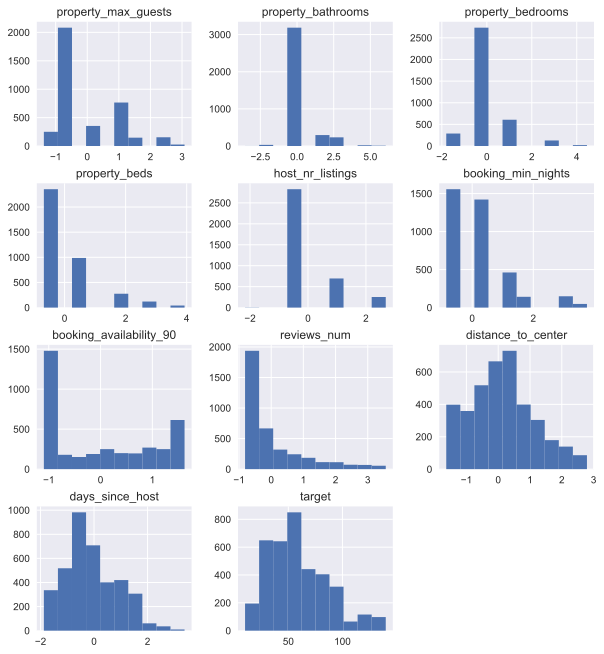

In [38]:
# Checking if numerical columns need logarithmic transforming
df[numerical_columns].hist(figsize=(10,11));
df['reviews_num'] = df['reviews_num'].replace(0, 0.01) # Replacing 0s with 0.01
df['reviews_num'] = np.log(df['reviews_num'])

## B. EDA and analysing the dataset

In [39]:
# Describing the complete dataset
pd.set_option('display.max_columns', None)
df.describe()

property_type  property_room_type  property_max_guests  \
count    3779.000000         3779.000000          3779.000000   
mean        0.790685            0.631384            -0.076968   
std         0.406873            0.482493             0.934845   
min         0.000000            0.000000            -1.373066   
25%         1.000000            0.000000            -0.630952   
50%         1.000000            1.000000            -0.630952   
75%         1.000000            1.000000             0.853276   
max         1.000000            1.000000             3.079619   

       property_bathrooms  property_bedrooms  property_beds  host_nr_listings  \
count         3779.000000        3779.000000    3779.000000       3779.000000   
mean             0.004131           0.025673      -0.048271         -0.041029   
std              0.983567           0.982903       0.974676          0.961715   
min             -3.543105          -1.803527      -0.677753         -2.172109   
25%             -0.345727          -0.239249      -0.677753         -0.553345   
50%             -0.345727          -0.239249      -0.677753         -0.553345   
75%             -0.345727          -0.239249       0.474213          1.065419   
max              6.049027           4.453586       3.930112          2.684184   

       booking_min_nights  booking_availability_90  reviews_num       target  \
count         3779.000000              3779.000000  1271.000000  3779.000000   
mean             0.031233                -0.021108    -0.375887    58.870601   
std              1.025480                 1.029209     1.192431    27.505694   
min             -0.847437                -1.094059    -3.143459    10.000000   
25%             -0.847437                -1.094059    -1.113874    39.000000   
50%              0.073132                -0.158577    -0.106931    53.000000   
75%              0.073132                 0.988143     0.561923    75.000000   
max              3.755410                 1.621856     1.269761   140.000000   

          Brussels  distance_to_center  \
count  3779.000000         3779.000000   
mean      0.826144            0.140348   
std       0.379035            0.983907   
min       0.000000           -1.633659   
25%       1.000000           -0.573705   
50%       1.000000            0.105592   
75%       1.000000            0.728431   
max       1.000000            2.790850   

       property_amenities: Laptop friendly workspace  \
count                                    3779.000000   
mean                                        0.492458   
std                                         0.500009   
min                                         0.000000   
25%                                         0.000000   
50%                                         0.000000   
75%                                         1.000000   
max                                         1.000000   

       property_amenities: Heating  property_amenities: Cable TV  \
count                  3779.000000                   3779.000000   
mean                      0.956867                      0.251125   
std                       0.203184                      0.433717   
min                       0.000000                      0.000000   
25%                       1.000000                      0.000000   
50%                       1.000000                      0.000000   
75%                       1.000000                      1.000000   
max                       1.000000                      1.000000   

       property_amenities: Iron  property_amenities: Wireless Internet  \
count               3779.000000                            3779.000000   
mean                   0.469966                               0.954221   
std                    0.499163                               0.209034   
min                    0.000000                               0.000000   
25%                    0.000000                               1.000000   
50%                    0.0000

### Numerical attributes

#### EDA: target

In [40]:
print(f"Target prices per night range from EUR {min(df.target)} to EUR {max(df.target)}.")
print(f"The median price over the total dataset is equal to EUR {df['target'].median()}.")

Target prices per night range from EUR 10 to EUR 140.
The median price over the total dataset is equal to EUR 53.0.


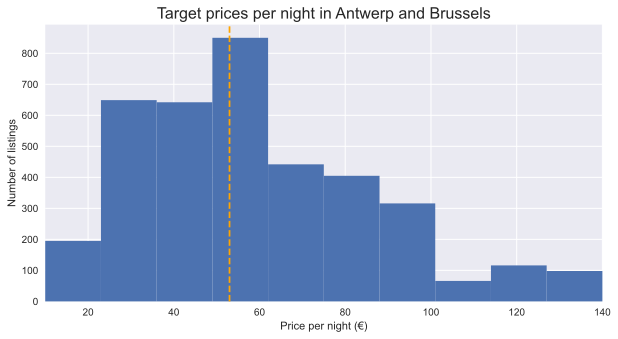

In [41]:
# Plotting the distribution of all prices 
plt.figure(figsize=(10,5))
df.target.hist(bins=10)
plt.margins(x=0)
plt.axvline(df['target'].median(), color='orange', linestyle='--')
plt.title("Target prices per night in Antwerp and Brussels", fontsize=16)
plt.xlabel("Price per night (€)")
plt.ylabel("Number of listings")
plt.show()

Text(0, 0.5, 'Number of listings')

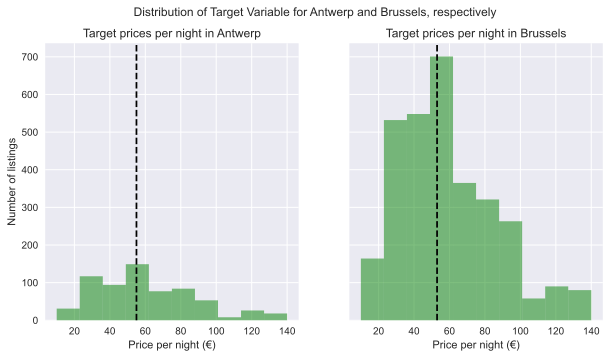

In [42]:
# Plotting the distribution of prices in Antwerp and Brussels, respectively
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Ploting the first histogram for Antwerp
axs[0].hist(df[df['Brussels'] == 0]['target'], bins=10, color='green', alpha=0.5)
axs[0].axvline(df[df['Brussels'] == 0]['target'].median(), color='black', linestyle='dashed')
axs[0].set_title('Target prices per night in Antwerp')

# Ploting the second histogram for Brussels
axs[1].hist(df[df['Brussels'] == 1]['target'], bins=10, color='green', alpha=0.5)
axs[1].axvline(df[df['Brussels'] == 1]['target'].median(), color='black', linestyle='dashed')
axs[1].set_title('Target prices per night in Brussels')

fig.suptitle('Distribution of Target Variable for Antwerp and Brussels, respectively')
axs[0].set_xlabel('Price per night (€)')
axs[1].set_xlabel('Price per night (€)')
axs[0].set_ylabel('Number of listings')

In [43]:
# Testing significant differences in prices between Antwerp and Brussels
Brussels = df[df['Brussels'] == 1]
Antwerp = df[df['Brussels'] == 0]

mean_bru = Brussels['target'].mean()
std_bru = Brussels['target'].std()
mean_ant = Antwerp['target'].mean()
std_ant = Antwerp['target'].std()

# Performing a two-sample t-test to check for significant differences between the two groups
t_stat, p_value = ttest_ind(Brussels['target'], Antwerp['target'], equal_var=False)

print("Statistical Description of Target Variable:")
print("Brussels = 1: mean = {:.2f}, std = {:.2f}".format(mean_bru, std_bru))
print("Brussels = 0: mean = {:.2f}, std = {:.2f}".format(mean_ant, std_ant))
print("\nResults of Two-Sample T-Test:")
print("t-statistic = {:.2f}, p-value = {:.4f}".format(t_stat, p_value))

Statistical Description of Target Variable:
Brussels = 1: mean = 58.67, std = 27.37
Brussels = 0: mean = 59.84, std = 28.12

Results of Two-Sample T-Test:
t-statistic = -0.98, p-value = 0.3274


#### EDA: distance_to_center

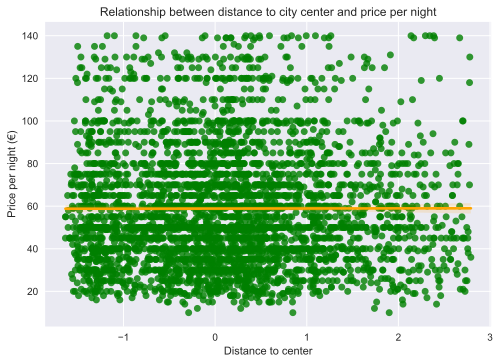

In [44]:
# Plotting the distance to historical city centers and the price per night
sns.regplot(x='distance_to_center', y='target', data=df, scatter_kws={'color': 'green'}, line_kws={'color': 'orange'})
plt.xlabel('Distance to center')
plt.ylabel('Price per night (€)')
plt.title('Relationship between distance to city center and price per night')
plt.show()

In [45]:
# Calculating the Pearson correlation coefficient and p-value for distance_to_center vs. target
corr_dist, pval_dist = pearsonr(df['target'], df['distance_to_center'])
print("Pearson correlation coefficient:", corr_dist)

Pearson correlation coefficient: 0.0016109722116570027


#### EDA: property_max_guests, property_bathrooms, property_bedrooms and property_beds

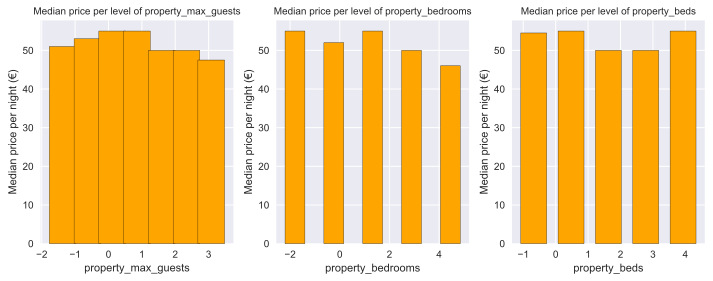

In [46]:
# Creating histograms for property_max_guests, property_bedrooms, and property_beds
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))
for i, feature in enumerate(['property_max_guests', 'property_bedrooms', 'property_beds']):
    # Grouping the data by the feature and calculating the median target value for each level
    grouped = df.groupby(feature)['target'].median()
    levels = grouped.index.values
    median_prices = grouped.values

    # Creating a bar plot of the median target values
    axs[i].bar(levels, median_prices, color='orange', alpha=1, edgecolor='black')
    axs[i].set_title('Median price per level of {}'.format(feature), fontsize = 10)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Median price per night (€)')

plt.tight_layout()
plt.show()

#### EDA: days_since_host, host_nr_listings and reviews_num

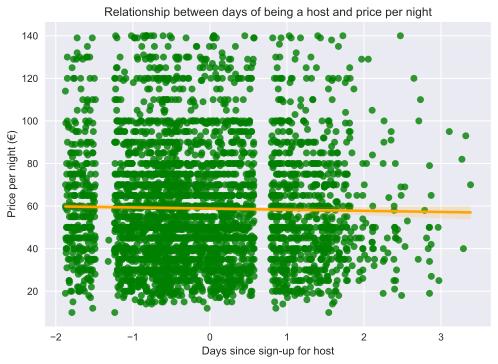

In [47]:
# Plotting the days of being a host and the price per night
sns.regplot(x='days_since_host', y='target', data=df, scatter_kws={'color': 'green'}, line_kws={'color': 'orange'})
plt.xlabel('Days since sign-up for host')
plt.ylabel('Price per night (€)')
plt.title('Relationship between days of being a host and price per night')
plt.show()

In [48]:
# Calculating the Pearson correlation coefficient and p-value for days_since_host vs. target
corr_dayshost, pval_dayshost = pearsonr(df['target'], df['days_since_host'])
print("Pearson correlation coefficient:", corr_dayshost)

Pearson correlation coefficient: -0.018784801173025292


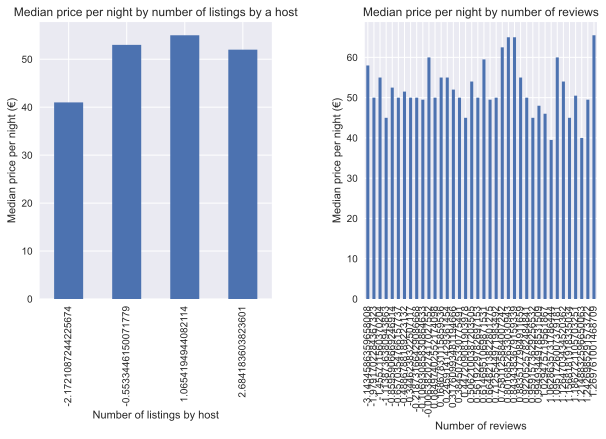

In [49]:
# Plotting the median price per night for host_nr_listings and reviews_num
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
df.groupby('host_nr_listings')['target'].median().plot(kind='bar', ax=axs[0])
axs[0].set_xlabel('Number of listings by host')
axs[0].set_ylabel('Median price per night (€)')
axs[0].set_title('Median price per night by number of listings by a host')

df.groupby('reviews_num')['target'].median().plot(kind='bar', ax=axs[1])
axs[1].set_xlabel('Number of reviews')
axs[1].set_ylabel('Median price per night (€)')
axs[1].set_title('Median price per night by number of reviews')

plt.subplots_adjust(wspace=0.4)
plt.show()

In [50]:
# Calculating the Pearson correlation coefficient and p-value for host_nr_listings vs. target
corr_listings, pval_listings = pearsonr(df['target'], df['host_nr_listings'])
print("Pearson correlation coefficient:", corr_listings)

Pearson correlation coefficient: -0.002336327143441457


#### EDA: booking_min_nights and booking_availability_90

No-one really looks at this while booking a property, hence there will be relatively low discriminatory power.

### Categorical attributes

#### EDA: property_type and property_room_type

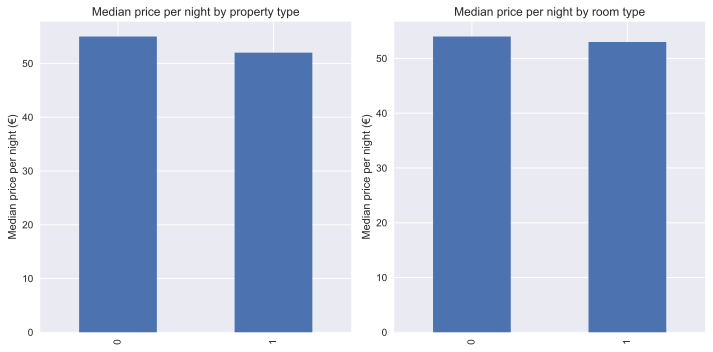

In [51]:
# Plotting the median price per night for property_type and property_room_type
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
median_prices_type = df.groupby('property_type')['target'].median().plot(kind='bar')
plt.xlabel('')
plt.ylabel('Median price per night (€)')
plt.title('Median price per night by property type')

plt.subplot(1, 2, 2)
median_prices_room = df.groupby('property_room_type')['target'].median().plot(kind='bar')
plt.xlabel('')
plt.ylabel('Median price per night (€)')
plt.title('Median price per night by room type')

plt.tight_layout()
plt.show()

In [52]:
# Testing for significance price differences for property_type
property_type_groups = [group['target'] for name, group in df.groupby('property_type')]
f_stat_property, p_value_property = f_oneway(*property_type_groups)

if p_value_property < 0.05:
    print("There are significant differences in target values between room types")
else:
    print("There are no significant differences in target values between room types")

There are significant differences in target values between room types


In [53]:
# Testing for significance price differences for property_room_type
room_type_groups = [group['target'] for name, group in df.groupby('property_room_type')]
f_stat_room, p_value_room = f_oneway(*room_type_groups)

if p_value_room < 0.05:
    print("There are significant differences in target values between room types")
else:
    print("There are no significant differences in target values between room types")

There are no significant differences in target values between room types


#### EDA: property_amenities

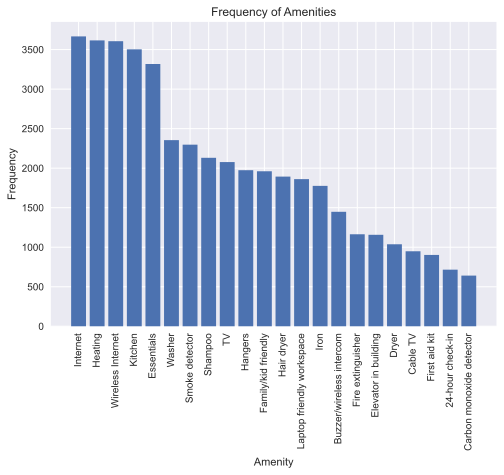

In [54]:
# Plotting the frequencies of every amenity within the filtered list of amenities
amenities_cols = [col for col in df.columns if col.startswith('property_amenities:')]
amenities_freq = df[amenities_cols].sum().sort_values(ascending=False)
amenities_names = [col.replace('property_amenities:', '') for col in amenities_freq.index]
plt.bar(amenities_names, amenities_freq)

plt.xlabel('Amenity')
plt.ylabel('Frequency')
plt.title('Frequency of Amenities')

plt.xticks(rotation=90)
plt.show()

#### EDA: host_response_rate

In [55]:
# Plotting the median target price by host response rates
#median_prices_response_rate = df.groupby('host_response_rate')['target'].median()
#median_prices_response_rate = median_prices_response_rate.reindex(['unknown', '0-49%', '50-89%', '90-99%', '100%'])
#median_prices_response_rate.plot(kind='bar')

#plt.xlabel('Host Response Rate')
#plt.ylabel('Median price per night (€)')
#plt.title('Median price per night by host response rate')
#plt.show()

#### EDA: booking_cancel_policy

In [56]:
# Plotting the median target price by booking_cancel_policy
#cancel_policy_median = df.groupby('booking_cancel_policy')['target'].mean()
#ax = cancel_policy_median.plot(kind='bar')

#ax.set_xlabel('Cancellation Policy')
#ax.set_ylabel('Median price per night (€)')
#ax.set_title('Median price per night by cancellation policy')
#plt.show()

In [57]:
# Performing ANOVA test for each pair of booking_cancel_policy levels
#for policy1, policy2 in itertools.combinations(df['booking_cancel_policy'].unique(), 2):
#    policy1_data = df[df['booking_cancel_policy'] == policy1]['target']
#    policy2_data = df[df['booking_cancel_policy'] == policy2]['target']
#    f_statistic, p_value = stats.f_oneway(policy1_data, policy2_data)
#    print(f'ANOVA test for {policy1} and {policy2}: F-statistic={f_statistic:.2f}, p-value={p_value:.4f}')

#### EDA: reviews_rating

In [58]:
# Plotting the median target price by rating
#median_prices_reviews_rating = df.groupby('reviews_rating')['target'].mean()
#median_prices_reviews_rating.plot(kind='bar')

#plt.xlabel('Review Rating')
#plt.ylabel('Mean price per night (€)')
#plt.title('Mean price per night by review rating')
#plt.show()

In [59]:
# Performign ANOVA test for each pair of booking_cancel_policy levels
#for rating1, rating2 in itertools.combinations(df['reviews_rating'].unique(), 2):
#    rating1_data = df[df['reviews_rating'] == rating1]['target']
#    rating2_data = df[df['reviews_rating'] == rating2]['target']
#    f_statistic, p_value = stats.f_oneway(rating1_data, rating2_data)
#    print(f'ANOVA test for {rating1} and {rating2}: F-statistic={f_statistic:.2f}, p-value={p_value:.4f}')


#### EDA: extra

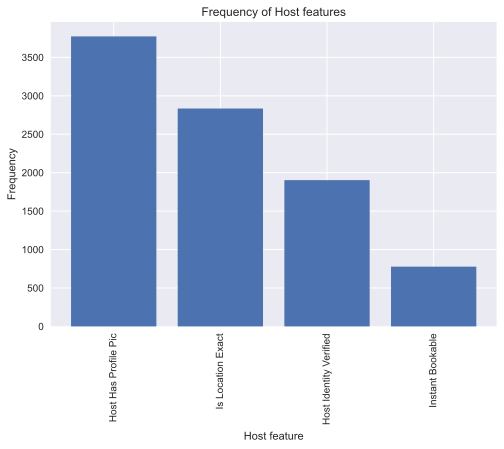

In [60]:
# Plotting the frequencies of every host feature within the filtered list of extras

extra_cols = [col for col in df.columns if col.startswith('extra:')]
extra_freq = df[extra_cols].sum().sort_values(ascending=False)

extra_names = [col.replace('extra:', '') for col in extra_freq.index]
plt.bar(extra_names, extra_freq)

plt.xlabel('Host feature')
plt.ylabel('Frequency')
plt.title('Frequency of Host features')

plt.xticks(rotation=90)
plt.show()

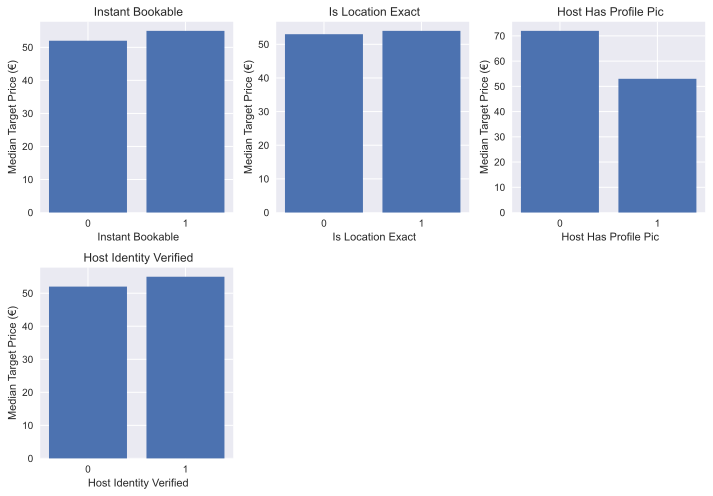

In [61]:
# PLotting a 3x3 matrix with each median price per night for each extra value
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
axes = ax.flatten()

# Looping through each column starting with "extra"
for i, col in enumerate(df.columns[df.columns.str.startswith('extra:')]):
    
    grouped = df.groupby(col)['target'].median()
    axes[i].bar(grouped.index.astype(str), grouped.values)
    axes[i].set_title(col.replace('extra:', ''))
    axes[i].set_xlabel(col.replace('extra:', ''))
    axes[i].set_ylabel('Median Target Price (€)')

for i in range(len(df.columns[df.columns.str.startswith('extra:')]), len(axes)):
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.show()

### Preparing the data for modeling

#### Checking for multicollinearity

/var/folders/br/y1wjgh1n2xxdt0ghw8bn5r_00000gn/T/ipykernel_4138/4288731056.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


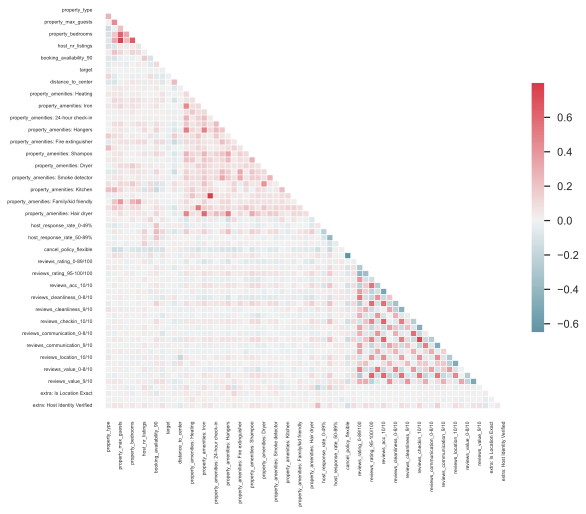

In [62]:
# Checking for multi-collinearity and dropping columns if necessary
def multi_collinearity_heatmap(df, figsize=(9, 7)):
    sns.set(style="white")
    
    # Remove "property_amenities:" from column names
    
    corr = df.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=figsize)
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max())
    
    # Adjust tick label rotation
    plt.xticks(rotation=90)
    plt.xticks(fontsize=5)
    plt.yticks(fontsize=5)
    
multi_collinearity_heatmap(df, figsize=(9, 9))


In [63]:
# Showing all attributes with a correlation over 0.4
def highlight_correlations(corr_matrix):
    n = corr_matrix.shape[0]
    for i in range(n):
        for j in range(i+1, n):
            if abs(corr_matrix.iloc[i, j]) >= 0.4 and i != j:
                print(f"Correlation between {corr_matrix.index[i]} and {corr_matrix.index[j]} is {corr_matrix.iloc[i, j]:.2f}")

corr_matrix = df.corr()
highlight_correlations(corr_matrix)

Correlation between property_room_type and property_max_guests is 0.44
Correlation between property_max_guests and property_bedrooms is 0.62
Correlation between property_max_guests and property_beds is 0.76
Correlation between property_bedrooms and property_beds is 0.64
Correlation between property_amenities: Laptop friendly workspace and property_amenities: Iron is 0.45
Correlation between property_amenities: Laptop friendly workspace and property_amenities: Hangers is 0.51
Correlation between property_amenities: Laptop friendly workspace and property_amenities: Hair dryer is 0.47
Correlation between property_amenities: Cable TV and property_amenities: TV is 0.52
Correlation between property_amenities: Iron and property_amenities: Hangers is 0.49
Correlation between property_amenities: Iron and property_amenities: Hair dryer is 0.59
Correlation between property_amenities: Wireless Internet and property_amenities: Internet is 0.80
Correlation between property_amenities: Hangers and pro

In [64]:
# Correlation area 1: accommodates (actually performs better when all attributes are in the model)

In [65]:
# Correlation area 2: amenities
amenities_to_drop = [
    "property_amenities: Dryer",
    "property_amenities: Hangers",
    "property_amenities: Internet",
    "property_amenities: Cable TV",
    "property_amenities: Laptop friendly workspace",
    "property_amenities: Hair dryer"

]

df.drop(amenities_to_drop, axis=1, inplace=True)

In [66]:
# Correlation area 3: reviews
reviews_to_drop = [
    "reviews_acc_0-8/10",
    "reviews_acc_10/10",
    "reviews_acc_9/10",
    "reviews_cleanliness_0-8/10",
    "reviews_cleanliness_10/10",
    "reviews_cleanliness_9/10",
    "reviews_checkin_0-8/10",
    "reviews_checkin_10/10",
    "reviews_checkin_9/10",
    "reviews_communication_0-8/10",
    "reviews_communication_10/10",
    "reviews_communication_9/10",
    "reviews_location_0-8/10",
    "reviews_location_10/10",
    "reviews_location_9/10",
    "reviews_value_0-8/10",
    "reviews_value_10/10",
    "reviews_value_9/10"
]

df.drop(reviews_to_drop, axis=1, inplace=True)

#### Separating X and Y

In [67]:
# Separating X and y
X = df.drop('target', axis=1)
y = df.target

# C. Building the model and Postprocessing

In [68]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [69]:
## Training the XGBoost regressor
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

train_mse = mean_squared_error(y_train, training_preds_xgb_reg)
val_mse = mean_squared_error(y_test, val_preds_xgb_reg)
train_rmse = np.sqrt(train_mse)
val_rmse = np.sqrt(val_mse)

print("\nTraining RMSE:", round(train_rmse, 4))
print("Validation RMSE:", round(val_rmse, 4))


Training RMSE: 8.5986
Validation RMSE: 30.0239


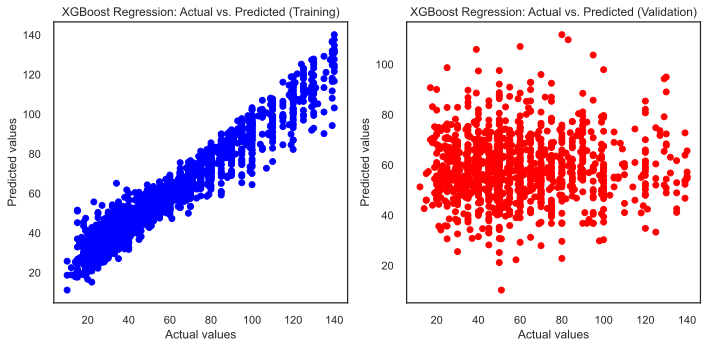

In [70]:
# Plotting predicted vs actual values for training and validation data
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].scatter(y_train, training_preds_xgb_reg, color='blue')
axs[0].set_xlabel('Actual values')
axs[0].set_ylabel('Predicted values')
axs[0].set_title('XGBoost Regression: Actual vs. Predicted (Training)')

axs[1].scatter(y_test, val_preds_xgb_reg, color='red')
axs[1].set_xlabel('Actual values')
axs[1].set_ylabel('Predicted values')
axs[1].set_title('XGBoost Regression: Actual vs. Predicted (Validation)')

plt.tight_layout()
plt.show()

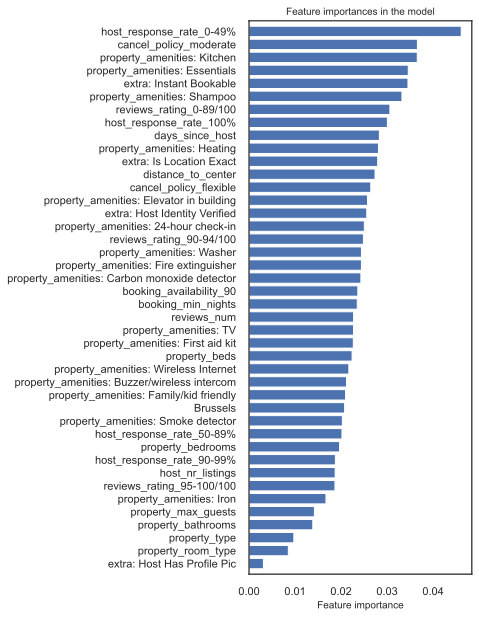

In [71]:
# Plotting the most important features
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)

plt.figure(figsize=(4,10))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the model", fontsize=10)
plt.xlabel("Feature importance", fontsize=10)
plt.margins(y=0.01)
plt.show()

In [72]:
# Loading the test set
test = pd.read_csv('../datasets/test.csv')

In [73]:
# Removing irrelevant and "free text" columns

# Deleted columns property_id
test.drop(['property_id'], axis=1, inplace=True)

# Deleted columns property_name
test.drop(['property_name'], axis=1, inplace=True)

# Deleted columns property_summary
test.drop(['property_summary'], axis=1, inplace=True)

# Deleted columns property_space
test.drop(['property_space'], axis=1, inplace=True)

# Deleted columns property_desc
test.drop(['property_desc'], axis=1, inplace=True)

# Deleted columns property_neighborhood
test.drop(['property_neighborhood'], axis=1, inplace=True)

# Deleted columns property_notes
test.drop(['property_notes'], axis=1, inplace=True)

# Deleted columns property_transit
test.drop(['property_transit'], axis=1, inplace=True)

# Deleted columns property_access
test.drop(['property_access'], axis=1, inplace=True)

# Deleted columns property_interaction
test.drop(['property_interaction'], axis=1, inplace=True)

# Deleted columns property_rules
test.drop(['property_rules'], axis=1, inplace=True)

# Deleted columns property_scraped_at
test.drop(['property_scraped_at'], axis=1, inplace=True)

# Deleted columns property_last_updated
test.drop(['property_last_updated'], axis=1, inplace=True)

# Deleted columns host_id
test.drop(['host_id'], axis=1, inplace=True)

# Deleted columns host_location
test.drop(['host_location'], axis=1, inplace=True)

# Deleted columns host_about
test.drop(['host_about'], axis=1, inplace=True)

# Deleted columns host_nr_listings_total
test.drop(['host_nr_listings_total'], axis=1, inplace=True)

# Deleted columns host_verified
test.drop(['host_verified'], axis=1, inplace=True)

# Deleted columns booking_max_nights
test.drop(['booking_max_nights'], axis=1, inplace=True)

# Deleted columns reviews_first
test.drop(['reviews_first'], axis=1, inplace=True)

# Deleted columns reviews_last
test.drop(['reviews_last'], axis=1, inplace=True)

# Deleted columns booking_price_covers
test.drop(['booking_price_covers'], axis=1, inplace=True)

In [74]:
# Checking missing values
test.isna().sum()

property_zipcode             14
property_lat                  0
property_lon                  0
property_type                 0
property_room_type            0
property_max_guests           0
property_bathrooms            1
property_bedrooms             0
property_beds                 3
property_bed_type             0
property_amenities            9
property_sqfeet             889
host_since                    0
host_response_time          196
host_response_rate          196
host_nr_listings              0
booking_min_nights            0
booking_availability_30       0
booking_availability_60       0
booking_availability_90       0
booking_availability_365      0
booking_cancel_policy         0
reviews_num                   0
reviews_rating              207
reviews_acc                 208
reviews_cleanliness         208
reviews_checkin             208
reviews_communication       208
reviews_location            208
reviews_value               208
reviews_per_month           199
extra   

In [75]:
# Removing other unnecessary columns 

# Deleted columns property_sqfeet
test.drop(['property_sqfeet'], axis=1, inplace=True)

# Deleted columns reviews_acc
test.drop(['reviews_acc'], axis=1, inplace=True)

# Deleted columns reviews_cleanliness
test.drop(['reviews_cleanliness'], axis=1, inplace=True)

# Deleted columns reviews_checkin
test.drop(['reviews_checkin'], axis=1, inplace=True)

# Deleted columns reviews_communication
test.drop(['reviews_communication'], axis=1, inplace=True)

# Deleted columns reviews_location
test.drop(['reviews_location'], axis=1, inplace=True)

# Deleted columns reviews_value
test.drop(['reviews_value'], axis=1, inplace=True)

# Deleted columns reviews_per_month
test.drop(['reviews_per_month'], axis=1, inplace=True)

In [76]:
# Removing host_response_time as its NaN values are identifal to host_response_rate
test.drop(['host_response_time'], axis=1, inplace=True)

In [77]:
# Cleaning property_zipcode

# Checking values
print(test['property_zipcode'].value_counts())

# Missing values
print(test['property_zipcode'].isna().sum())
test['property_zipcode'] = test['property_zipcode'].fillna(1000) #We impute with the mode property_zipcode from the training set

# Transformations
test['property_zipcode'] = test['property_zipcode'].apply(lambda x: str(x))
test['property_zipcode'] = test['property_zipcode'].apply(lambda x: 'Brussels' if x.startswith('1') else ('Antwerp' if x.startswith('2') else x))
one_hot_ziptest = pd.get_dummies(test['property_zipcode'])
test = test.drop('property_zipcode', axis=1).join(one_hot_ziptest)
test = test.drop('Antwerp', axis=1)

1000.0    268
1050.0    140
1060.0     90
1030.0     59
2000.0     51
1040.0     45
1180.0     35
1190.0     32
2018.0     22
1070.0     20
2060.0     18
1080.0     16
1200.0     14
1090.0     12
2140.0     11
1160.0     11
1210.0     10
1150.0      9
1020.0      8
1081.0      8
2100.0      6
1170.0      4
1140.0      4
2600.0      3
2610.0      2
2170.0      2
1800.0      1
2020.0      1
1082.0      1
1212.0      1
1120.0      1
Name: property_zipcode, dtype: int64
14


In [78]:
# Cleaning property_lat and property_lon

# Missing values
print(test['property_lat'].isna().sum())
print(test['property_lon'].isna().sum())

# We first calculate the new column distance_to_center
brussels_lat = 50.8503
brussels_lon = 4.3517
antwerp_lat = 51.2194
antwerp_lon = 4.4025

test['distance_to_center'] = np.where(test['Brussels'] == 1, 
                                         test.apply(lambda row: calculate_distance(row['property_lat'], row['property_lon'], brussels_lat, brussels_lon), axis=1), 
                                         test.apply(lambda row: calculate_distance(row['property_lat'], row['property_lon'], antwerp_lat, antwerp_lon), axis=1))

# Transformations
test['distance_to_center'] = scaler.fit_transform(test[['distance_to_center']])

test = test.drop('property_lon', axis=1)
test = test.drop('property_lat', axis=1)

0
0


In [79]:
# Cleaning property_type

# Checking values
print(test['property_type'].value_counts())

# Missing values
print(test['property_type'].isna().sum())
test['property_type'] = test['property_type'].apply(lambda x: 'Apartment' if x == 'Apartment' else 'Other')

# Transformations 
test['property_type'] = test['property_type'].map({'Apartment': 1, 'Other': 0})

Apartment             729
House                 109
Loft                   19
Townhouse              19
Bed & Breakfast        12
Condominium             9
Guesthouse              6
Other                   5
Villa                   4
Dorm                    3
Serviced apartment      1
Boat                    1
Earth House             1
Boutique hotel          1
Name: property_type, dtype: int64
0


In [80]:
# Cleaning property_room_type

# Checking values
print(test['property_room_type'].value_counts())

# Missing values
print(test['property_room_type'].isna().sum())

# Transformations
test['property_room_type'] = test['property_room_type'].map({'Entire home/apt': 1, 'Private room': 0, 'Shared room': 0})

Entire home/apt    628
Private room       278
Shared room         13
Name: property_room_type, dtype: int64
0


In [81]:
# Cleaning property_max_guests

# Checking values
print(test['property_max_guests'].value_counts())

# Missing values
print(test['property_max_guests'].isna().sum())

# Transformations
test['property_max_guests'] = scaler.fit_transform(test[['property_max_guests']])

2     442
4     189
1      74
3      71
6      67
5      33
7      13
10     10
8       9
16      7
9       2
14      1
12      1
Name: property_max_guests, dtype: int64
0


In [82]:
# Cleaning property_bathrooms

# Checking values
print(test['property_bathrooms'].value_counts())

# Missing values
print(test['property_bathrooms'].isna().sum())
test['property_bathrooms'].fillna(median_property_bathrooms, inplace=True)

# Transformations
test['property_bathrooms'] = scaler.fit_transform(test[['property_bathrooms']])

1.0    716
1.5     90
2.0     69
2.5     17
0.5      7
3.0      7
0.0      4
8.0      4
4.0      2
7.0      1
5.5      1
Name: property_bathrooms, dtype: int64
1


In [83]:
# Cleaning property_bedrooms

# Checking values
print(test['property_bedrooms'].value_counts())

# Missing values
print(test['property_bedrooms'].isna().sum())
test['property_bedrooms'].fillna(median_property_bedrooms, inplace=True)

# Transformations
test['property_bedrooms'] = scaler.fit_transform(test[['property_bedrooms']])

1     604
2     167
0      92
3      33
4       9
5       7
10      6
6       1
Name: property_bedrooms, dtype: int64
0


In [84]:
# Cleaning property_beds

# Checking values
print(test['property_beds'].value_counts())

# Missing values
print(test['property_beds'].isna().sum())
test['property_beds'].fillna(median_property_beds, inplace=True)

# Transformations
test['property_beds'] = scaler.fit_transform(test[['property_beds']])

1.0     528
2.0     204
3.0      73
4.0      67
5.0      18
6.0      12
16.0      6
8.0       3
7.0       3
10.0      2
Name: property_beds, dtype: int64
3


In [85]:
# Cleaning property_bed_type

# Checking valyes
print(test['property_bed_type'].value_counts())

# Remove property_bed_type
test.drop(['property_bed_type'], axis=1, inplace=True)

Real Bed         871
Pull-out Sofa     30
Futon             11
Couch              5
Airbed             2
Name: property_bed_type, dtype: int64


In [86]:
# Cleaning property_amenities

# Missing values
print(test['property_amenities'].isna().sum())
test['property_amenities'] = test['property_amenities'].fillna('')

# Create dummy columns vis a vis amenities for each property
test = set_to_dummies(test, 'property_amenities')

# Remove original property_amenities
test.drop(['property_amenities'], axis=1, inplace=True)

# Only include those amenities where one category (zero or one) occurs more than 20% of the time (in training)
test = test.drop(columns=set(test.columns).intersection(dropped_cols_amenities))

9


In [87]:
# Cleaning host_since

# Missing values 
print(test['host_since'].isna().sum())

# Transformations
test.host_since = pd.to_datetime(test.host_since) 
test['days_since_host'] = (pd.to_datetime('today') - pd.to_datetime(test['host_since'])).dt.days
test.drop(['host_since'], axis=1, inplace=True)
test['days_since_host'] = scaler.fit_transform(test[['days_since_host']])

0


In [88]:
# Cleaning host_response_rate

# Missing values 
print(test['host_response_rate'].isna().sum())
test['host_response_rate'] = test['host_response_rate'].fillna('unknown')

test['host_response_rate'] = pd.to_numeric(test['host_response_rate'], errors='coerce')
test['host_response_rate'] = pd.cut(test['host_response_rate'], bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)
test.host_response_rate = test.host_response_rate.astype('str')
test.host_response_rate.replace('nan', 'unknown', inplace=True)

# Transformations 
host_response_rate_dummies_t = pd.get_dummies(test.host_response_rate, prefix="host_response_rate")
test = pd.concat([test, host_response_rate_dummies_t], axis=1)
test.drop("host_response_rate", axis=1, inplace=True)
test.drop("host_response_rate_unknown", axis=1, inplace=True)

196


In [89]:
# Cleaning host_nr_listings

# Missing values
print(test['host_nr_listings'].isna().sum())

# Transformations
test['host_nr_listings'] = scaler.fit_transform(test[['host_nr_listings']])

0


In [90]:
# Cleaning booking_min_nights

# Missing values
print(test['booking_min_nights'].isna().sum())

# Transformations
test['booking_min_nights'] = scaler.fit_transform(test[['booking_min_nights']])

0


In [91]:
# Cleaning booking_availability

# Missing values
test.drop(['booking_availability_30'], axis=1, inplace=True)
test.drop(['booking_availability_60'], axis=1, inplace=True)
test.drop(['booking_availability_365'], axis=1, inplace=True)
print(test['booking_availability_90'].isna().sum())

# Outliers (not relevant)

# Transformations
test['booking_availability_90'] = scaler.fit_transform(test[['booking_availability_90']])

0


In [92]:
# Cleaning booking_cancel_policy

# Checking values
print(test['booking_cancel_policy'].value_counts())

# Missing values
print(test['booking_cancel_policy'].isna().sum())

# Transformations
dummies_cancel_t = pd.get_dummies(test['booking_cancel_policy'], prefix='cancel_policy')
test = pd.concat([test, dummies_cancel_t], axis=1)
test.drop(['booking_cancel_policy'], axis=1, inplace=True)
test.drop(['cancel_policy_strict'], axis=1, inplace=True)

flexible    406
strict      259
moderate    254
Name: booking_cancel_policy, dtype: int64
0


In [93]:
# Cleaning reviews_num

# Missing values
print(test['reviews_num'].isna().sum())
test['reviews_num'] = test['reviews_num'].fillna('mode_reviews_num')

# Transformations
test['reviews_num'] = scaler.fit_transform(test[['reviews_num']])

0


In [94]:
# Cleaning reviews_rating

# Missing values
print(test['reviews_rating'].isna().sum())
test['reviews_rating'] = test['reviews_rating'].fillna('unknown')

test['reviews_rating'] = pd.to_numeric(test['reviews_rating'], errors='coerce')
test['reviews_rating'] = pd.cut(test['reviews_rating'], bins=[0, 90, 95, 100], labels=['0-89/100', '90-94/100', '95-100/100'], include_lowest=True)
test.reviews_rating = test.reviews_rating.astype('str')
test.reviews_rating.replace('nan', 'unknown', inplace=True)

# Transformations
reviews_rating_dummies_t = pd.get_dummies(test.reviews_rating, prefix="reviews_rating")
test = pd.concat([test, reviews_rating_dummies_t], axis=1)
test.drop("reviews_rating", axis=1, inplace=True)
test.drop("reviews_rating_unknown", axis=1, inplace=True)

207


In [95]:
# Cleaning extra

# Missing values
print(test['extra'].isna().sum())
test['extra'] = test['extra'].fillna('')

# Creating dummy columns vis a vis amenities for each property
test = new_set_to_dummies(test, 'extra')

# Removing original property_amenities
test.drop(['extra'], axis=1, inplace=True)

# Only including those extras where one category (zero or one) occurs more than 20% of the time
test = test.drop(columns=set(test.columns).intersection(dropped_cols_extra))

0


In [96]:
# Checking if all data types are OK for the remaining columns
for col_name, data_type in test.dtypes.iteritems():
    print(f'{col_name}: {data_type}')

property_type: int64
property_room_type: int64
property_max_guests: float64
property_bathrooms: float64
property_bedrooms: float64
property_beds: float64
host_nr_listings: float64
booking_min_nights: float64
booking_availability_90: float64
reviews_num: float64
Brussels: uint8
distance_to_center: float64
property_amenities: Laptop friendly workspace: int64
property_amenities: Heating: int64
property_amenities: Cable TV: int64
property_amenities: Iron: int64
property_amenities: Wireless Internet: int64
property_amenities: 24-hour check-in: int64
property_amenities: Carbon monoxide detector: int64
property_amenities: Hangers: int64
property_amenities: Buzzer/wireless intercom: int64
property_amenities: Fire extinguisher: int64
property_amenities: Elevator in building: int64
property_amenities: Shampoo: int64
property_amenities: Essentials: int64
property_amenities: Dryer: int64
property_amenities: First aid kit: int64
property_amenities: Smoke detector: int64
property_amenities: Washer: 

In [97]:
# Checking if all numerical columns are standardized

numerical_columns_t = ['property_max_guests', 'property_bathrooms', 'property_bedrooms', 
                     'property_beds', 'host_nr_listings', 'booking_min_nights', 'booking_availability_90', 
                     'reviews_num', 'distance_to_center', 'days_since_host']

# Checking if the mean and standard deviation of each numerical column are close to 0 and 1
for col in numerical_columns_t:
    mean = test[col].mean()
    std = test[col].std()
    if abs(mean) > 0.1 or abs(std - 1) > 0.1:
        print(f'Column "{col}" is not standardized (mean = {mean:.2f}, std = {std:.2f})')
    else:
        print(f'Column "{col}" is standardized (mean = {mean:.2f}, std = {std:.2f})')

Column "property_max_guests" is standardized (mean = -0.00, std = 1.00)
Column "property_bathrooms" is standardized (mean = 0.00, std = 1.00)
Column "property_bedrooms" is standardized (mean = -0.00, std = 1.00)
Column "property_beds" is standardized (mean = -0.00, std = 1.00)
Column "host_nr_listings" is standardized (mean = -0.00, std = 1.00)
Column "booking_min_nights" is standardized (mean = 0.00, std = 1.00)
Column "booking_availability_90" is standardized (mean = 0.00, std = 1.00)
Column "reviews_num" is standardized (mean = 0.00, std = 1.00)
Column "distance_to_center" is standardized (mean = 0.00, std = 1.00)
Column "days_since_host" is standardized (mean = 0.00, std = 1.00)


In [98]:
# Log-transforming reviews_num
test['reviews_num'] = test['reviews_num'].replace(0, 0.01) # Replacing 0s with 0.01
test['reviews_num'] = np.log(test['reviews_num'])

/Users/simonkuhn/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [99]:
# Correlation area 2: amenities
test.drop(amenities_to_drop, axis=1, inplace=True)

In [100]:
# Correlation area 3: reviews – already dropped

In [101]:
# Getting predictions for test set
predictions = xgb_reg.predict(test).astype(int)
predictions = np.ceil(predictions)

# Adding predictions as a new column to the DataFrame
test['predictions'] = predictions

# Getting the path to the desktop
desktop_path = os.path.expanduser("~/Desktop")

# Exporting the DataFrame to a CSV file on the desktop
test.to_csv(os.path.join(desktop_path, "test_predicted_090523_1836.csv"), index=False, float_format='%.2f')